# Boundary Value Problems

* Shooting Method
* Relaxation Method
* Over-relaxation Method

## Shooting Method

### Notes:


## WITHOUT USING RFA

SUCCESS | SOLUTION CONVERGED!


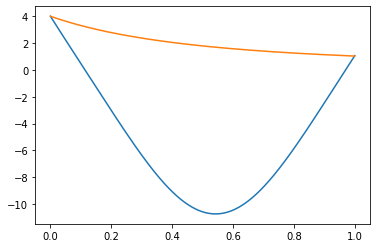

In [81]:
import numpy as np, scipy as sc, matplotlib.pyplot as plt

# Taken from ODEs.ipynb
def leapfrog_solver(A, x0, v0, t0, tn, dt=1e-3):
    """
    INPUT:
    A: "Accelaration" | Function, on RHS of the original ODE
    x0: Initial Condition | Value of x, at t = t0
    v0: Initial Condition/Velocity | Value of dx/dt, at t = t0
    t0: Start Time
    tn: End Time
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    N = int(np.ceil((tn - t0)/dt))
     
    x = np.zeros(N, dtype=float)
    v = np.zeros(N, dtype=float)
    t = np.linspace(t0, tn, N, dtype=float)
    
    # Initial Conditions
    x[0] = x0
    v[0] = v0 + A(x[0])*(dt/2) # = v_{1/2} = v_0 + a_0(dt/2). Next step will be v_{3/2} == v[1] and so on...

    for i in range(N-1):
        x[i+1] = x[i] + v[i]*dt
        v[i+1] = v[i] + A(x[i])*dt
    
    return t, x

def bvp_shoot(f, x_lim, t_lim, v0_guesses, dt=1e-3):
    """
    Shooting Algorithm for Boundary Value Problems
    Uses Leapfrog Integration for the IVP & Newton-Raphson for Root Finding
    
    INPUT:
    f: "Accelaration" | Function, on RHS of the original ODE
    x_lim: Tuple | Contains Initial Conditions, x(t = t0) = x0 & x(t = tn) = xn | (x0, xn)
    t_lim: Tuple | Contains Time Limits | Start Time, t0 and End Time, tn | (t0, tn)
    v0_guesses: Numpy Array | Contains initial guesses for x'(t = t0)
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    SOL_FLAG = False # "True" indicates discovery of at least 1 solution
    for i, v0 in enumerate(v0_guesses):
        t, x = leapfrog_solver(f, x_lim[0], v0, *t_lim, dt)
        if np.abs(x_lim[1] - x[-1]) <= 0.1: # TOL
            plt.plot(t, x)
            SOL_FLAG = True

    if SOL_FLAG:
        print("SUCCESS | SOLUTION CONVERGED!")
    else:
        print("FAILURE | NO SOLUTION FOUND!")
     

# MODULE TEST
f = lambda x: 1.5*x**2
x_lim = (4, 1)
t_lim = (0, 1)
v0_guesses = np.arange(-100, 0)
dt = 1e-3

bvp_shoot(f, x_lim, t_lim, v0_guesses, dt)

## USING RFA (SECANT METHOD)

ROOT:  -10.0 64
[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0

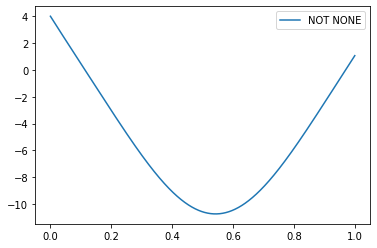

In [78]:
import numpy as np, scipy as sc, matplotlib.pyplot as plt

# Taken from ODEs.ipynb
def leapfrog_solver(A, x0, v0, t0, tn, dt=1e-3):
    """
    INPUT:
    A: "Accelaration" | Function, on RHS of the original ODE
    x0: Initial Condition | Value of x, at t = t0
    v0: Initial Condition/Velocity | Value of dx/dt, at t = t0
    t0: Start Time
    tn: End Time
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    N = int(np.ceil((tn - t0)/dt))
     
    x = np.zeros(N, dtype=float)
    v = np.zeros(N, dtype=float)
    t = np.linspace(t0, tn, N, dtype=float)
    
    # Initial Conditions
    x[0] = x0
    v[0] = v0 + A(x[0])*(dt/2) # = v_{1/2} = v_0 + a_0(dt/2). Next step will be v_{3/2} == v[1] and so on...

    for i in range(N-1):
        x[i+1] = x[i] + v[i]*dt
        v[i+1] = v[i] + A(x[i])*dt
    
    return t, x

# Adapted from rfa_secant() from Root Finding Algorithms.ipynb
def rfa_secant(f, t0, t1, iters, tol=1e-6):
    """
    f: Functional values, with index, for the function, whose root is to be found
    t0: First guess for the root
    t1: Second guess for the root
    iters: Number of Iterations
    tol: Tolerance value, for Meshing & Convergence Check
    """
    func = np.take(f, indices=0, axis=1)
    # Array of successive "better" guesses for the root (ideally)
    t = np.array([t0, t1] + iters*[None], dtype=float)
    # Initial Guesses
    t[0], t[1] = t0, t1

    for i in range(iters):
        t[i+2] = t[i+1] - func[i+1]*((t[i+1] - t[i])/(func[i+1] - func[i]))
        # Convergence Test
        if np.abs(func[i+2]) <= tol:
            return t[i+2], i+2
    else:
        print("Last calculated guess does not satisfy the Tolerance Limit, in the specified Number of Iterations.")
        return None
    

def bvp_shoot(f, x_lim, t_lim, v0_guesses, guess_for_rfa, dt=1e-3):
    """
    Shooting Algorithm for Boundary Value Problems
    Uses Leapfrog Integration for the IVP & Secant Method for Root Finding
    
    INPUT:
    f: "Accelaration" | Function, on RHS of the original ODE
    x_lim: Tuple | Contains Initial Conditions, x(t = t0) = x0 & x(t = tn) = xn | (x0, xn)
    t_lim: Tuple | Contains Time Limits | Start Time, t0 and End Time, tn | (t0, tn)
    v0_guesses: Numpy Array | Contains initial guesses for x'(t = t0)
    guess_for_rfa: Tuple | Contains the Initial Root Guess, Number of Iterations and Tolerance Value for RFA | (x0, x1, iters, tol)
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    F, t0, x0 = [], [], []
    for i, v0 in enumerate(v0_guesses):
        t, x = leapfrog_solver(f, x_lim[0], v0, *t_lim, dt)
        t0.append(t)
        x0.append(x)
        F.append([x_lim[1] - x[-1], i]) # Function at x1, whose roots are to be found | 'i' is to coorelate with guess
    
#     print(F)
    root, index = rfa_secant(np.array(F, dtype=float), *guess_for_rfa)
    print("ROOT: ", root, index)
    
    if root is not None: # If root is found, it means, A SOLUTION has been found
        return t0[index], x0[index]
    else:
        print("Solution did not converge.")
        return None, None


# MODULE TEST
f = lambda x: 1.5*x**2
x_lim = (4, 1)
t_lim = (0, 1)
v0_guesses = np.arange(-100, 0)


t0_rfa = -10
t1_rfa = -10
iters_rfa = 100
tol_rfa = 0.1

guess_for_rfa = (t0_rfa, t1_rfa, iters_rfa, tol_rfa)
dt = 1e-3

t_res, x_res = bvp_shoot(f, x_lim, t_lim, v0_guesses, guess_for_rfa, dt)
print(t_res, x_res)
# t, x = [], []
# for t, x in bvp_shoot(f, x_lim, t_lim, v0_guesses, guess_for_rfa, dt):
if t_res is not None and x_res is not None:
    plt.plot(t_res, x_res, label='NOT NONE')
    plt.legend()